In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('perceptron_toydata-truncated.txt', sep='\t')
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [5]:
X_train = df.drop('label', axis=1).values
y_train = df['label'].values

In [6]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [7]:
X_train.shape

(20, 2)

In [8]:
y_train.shape

(20,)

In [10]:
np.bincount(y_train)

array([10, 10])

# Visualization

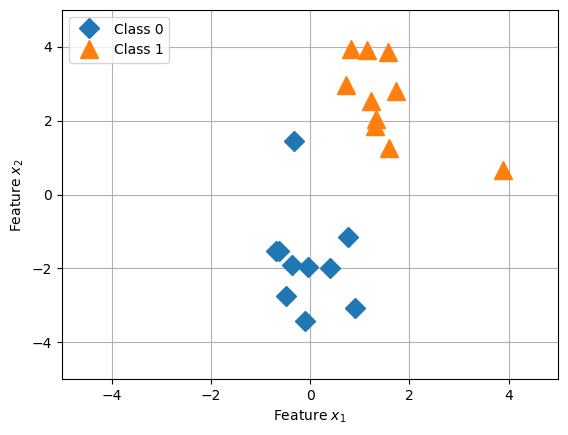

In [13]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 'upper left')

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')

plt.grid()
plt.show()

# Implementing Perceptron

In [17]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0
    
    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
        
        if weighted_sum_z > 0:
            return 1
        else:
            return 0
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        
        return error

In [40]:
ppn = Perceptron(2)
x = [1.1, 2.1]

ppn.update(x, 1)
print(ppn.weights)
print(ppn.bias)

[1.1, 2.1]
1.0


In [41]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0
        for x, y in zip(all_x, all_y):
           error = model.update(x, y)
           error_count += abs(error)
        
        print('Epoch: {}, Error: {}'.format(epoch+1, error_count))

In [42]:
ppn = Perceptron(2)

train(ppn, X_train, y_train, epochs=10)

Epoch: 1, Error: 1
Epoch: 2, Error: 3
Epoch: 3, Error: 1
Epoch: 4, Error: 0
Epoch: 5, Error: 0
Epoch: 6, Error: 0
Epoch: 7, Error: 0
Epoch: 8, Error: 0
Epoch: 9, Error: 0
Epoch: 10, Error: 0


In [43]:
print('Weights: {}'.format(ppn.weights))
print('Bias: {}'.format(ppn.bias))

Weights: [2.86, 1.98]
Bias: -3.0


# Evaluating the results

In [44]:
def compute_accuracy(model, all_x, all_y):
    correct_preds = 0
    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct_preds += int(prediction == y)

    return correct_preds / len(all_y)

In [45]:
train_acc = compute_accuracy(ppn, X_train, y_train)
print('Train accuracy: {}%'.format(train_acc*100))

Train accuracy: 100.0%


# Visualization of the boundry

In [49]:
# w1*x1 + w2*x2 + b = 0
# x2 = -(w1*x1 + b) / w2
def plot_boundry(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -10
    x2_min = -(w1*x1_min + b) / w2

    x1_max = 10
    x2_max = -(w1*x1_max + b) / w2

    return x1_min, x1_max, x2_min, x2_max

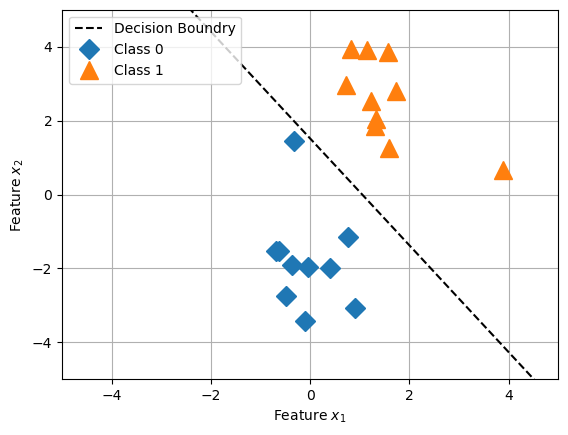

In [50]:
x1_min, x1_max, x2_min, x2_max = plot_boundry(ppn)

plt.plot([x1_min, x1_max], [x2_min, x2_max], 'k--', label='Decision Boundry')

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 'upper left')

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')

plt.grid()
plt.show()